#1 EDA AND CLEANING DATA

Purpose: To research and clean a retail sales data set to identify trends in sales, customer behavior and product performance.

Dataset: The Superstore Sales Dataset (available on Kaggle) (https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)

In [ ]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import shapiro, kstest, normaltest, expon
sns.set(style="whitegrid")


# Download and View Data:





Load the dataset using Pandas. Review structure, data types, and content (eg, sales, revenue, customer segments, regions) Display summary statistics (mean, median, standard deviation) for numeric columns.

In [ ]:
df = pd.read_csv("SuperStore.csv",encoding='windows-1254')
print(df.head(10))

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
5       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
6       7  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
7       8  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
8       9  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
9      10  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United 

In [ ]:
print("\nData types:")
print(df.info())

print("\nSummary statistics for numeric columns, where 50% is the median and std is the standard deviation:")
print(df.describe())


Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64


In [ ]:
print("Меdian:\n", df.median(numeric_only=True))
print("\nStandard deviation:\n", df.std(numeric_only=True))

Меdian:
 Row ID          4997.5000
Postal Code    56430.5000
Sales             54.4900
Quantity           3.0000
Discount           0.2000
Profit             8.6665
dtype: float64

Standard deviation:
 Row ID          2885.163629
Postal Code    32063.693350
Sales            623.245101
Quantity           2.225110
Discount           0.206452
Profit           234.260108
dtype: float64


the "Superstore Sales Dataset" data set from the Kaggle platform, containing 9800 rows and 18 columns, was downloaded. The dataset presents information about retail sales, including details about orders, customers, regions and products.


# Clear Data:

Identify and process missing data (delete or replace).  <ins>Identify and remove outliers</ins> that may bias the analysis, using interquartile range or Z-score Ensure consistency of categorical data (e.g., not writing categories)

In [ ]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['Order Date', 'Ship Date'])

In [ ]:
df['Delivery Time (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Order Day of Week'] = df['Order Date'].dt.isocalendar().day
df['Order Month'] = df['Order Date'].dt.month
df['Order Week of Year'] = df['Order Date'].dt.isocalendar().week
df['Order Day of Year'] = df['Order Date'].dt.dayofyear
df['Order Year'] = df['Order Date'].dt.year
df['Order Quarter'] = df['Order Date'].dt.quarter

In [ ]:
print(df[['Order Date', 'Ship Date', 'Delivery Time (Days)', 'Order Day of Week',
          'Order Month', 'Order Week of Year', 'Order Day of Year',
          'Order Year', 'Order Quarter']].head())


   Order Date  Ship Date  Delivery Time (Days)  Order Day of Week  \
0  2016-08-11 2016-11-11                    92                  4   
1  2016-08-11 2016-11-11                    92                  4   
13 2016-05-12 2016-10-12                   153                  4   
35 2016-08-12 2016-10-12                    61                  5   
36 2016-08-12 2016-10-12                    61                  5   

    Order Month  Order Week of Year  Order Day of Year  Order Year  \
0             8                  32                224        2016   
1             8                  32                224        2016   
13            5                  19                133        2016   
35            8                  32                225        2016   
36            8                  32                225        2016   

    Order Quarter  
0               3  
1               3  
13              2  
35              3  
36              3  


In [ ]:
print(df.isnull().sum())
df = df.dropna(subset=['Postal Code'])

Row ID                  0
Order ID                0
Order Date              0
Ship Date               0
Ship Mode               0
Customer ID             0
Customer Name           0
Segment                 0
Country                 0
City                    0
State                   0
Postal Code             0
Region                  0
Product ID              0
Category                0
Sub-Category            0
Product Name            0
Sales                   0
Quantity                0
Discount                0
Profit                  0
Delivery Time (Days)    0
Order Day of Week       0
Order Month             0
Order Week of Year      0
Order Day of Year       0
Order Year              0
Order Quarter           0
dtype: int64


In [ ]:
duplicates = df.duplicated()
print(f"Number of duplicate lines: {duplicates.sum()}")

Number of duplicate lines: 0


we are going to find the zscore where $ Z = \frac{x - \mu}{\sigma} $

Z	=	standard score
x	=	observed value (value)
$\mu$	=	mean of the sample
$\sigma$	=	standard deviation of the sample

**where $\sigma$**

$\sigma={\sqrt {\frac {\sum(x_{i}-{\mu})^{2}}{N}}}$

$\sigma$	=	population standard deviation
N	=	the size of the population
$x_i$	=	each value from the population
$\mu$	=	the population mean







In [ ]:
print("Available columns in DataFrame:")
print(df.columns.tolist())

numeric_columns = [
    'Sales'
]

data_clean = df.copy()
data_clean[numeric_columns] = data_clean[numeric_columns].astype(float)
# in this line we are generating z scores of the data frame where we made copy of the df
z_scores = np.abs(stats.zscore(data_clean[numeric_columns], nan_policy='omit'))
# generating df with z scores
z_scores_df = pd.DataFrame(z_scores, columns=numeric_columns)
# we are detecting ouliers where z_scores>3
outliers = (z_scores_df > 3).any(axis=1)

print(f"Number of outliers: {outliers.sum()}")
print("\nLines with outliers :")
print(data_clean[outliers].head())

data_cleaned = data_clean[~outliers]


Available columns in DataFrame:
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Delivery Time (Days)', 'Order Day of Week', 'Order Month', 'Order Week of Year', 'Order Day of Year', 'Order Year', 'Order Quarter']
Number of outliers: 33

Lines with outliers :
     Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
165     166  CA-2014-139892 2014-08-09 2014-12-09  Standard Class    BM-11140   
318     319  CA-2014-164973 2014-04-11 2014-09-11  Standard Class    NM-18445   
353     354  CA-2016-129714 2016-01-09 2016-03-09     First Class    AB-10060   
399     400  CA-2016-108987 2016-08-09 2016-10-09    Second Class    AG-10675   
683     684  US-2017-168116 2017-04-11 2017-04-11        Same Day    GT-14635   

       Customer Name      Segment        

In [ ]:
print("\n cleared data:")
print(data_cleaned.head())
print(data_cleaned.info())


 cleared data:
    Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0        1  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
1        2  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
13      14  CA-2016-161389 2016-05-12 2016-10-12  Standard Class    IM-15070   
35      36  CA-2016-117590 2016-08-12 2016-10-12     First Class    GH-14485   
36      37  CA-2016-117590 2016-08-12 2016-10-12     First Class    GH-14485   

   Customer Name    Segment        Country        City  ... Quantity  \
0    Claire Gute   Consumer  United States   Henderson  ...        2   
1    Claire Gute   Consumer  United States   Henderson  ...        3   
13  Irene Maddox   Consumer  United States     Seattle  ...        3   
35     Gene Hale  Corporate  United States  Richardson  ...        7   
36     Gene Hale  Corporate  United States  Richardson  ...        5   

    Discount    Profit Delivery Time (Days) Order Day of Week Order Mo

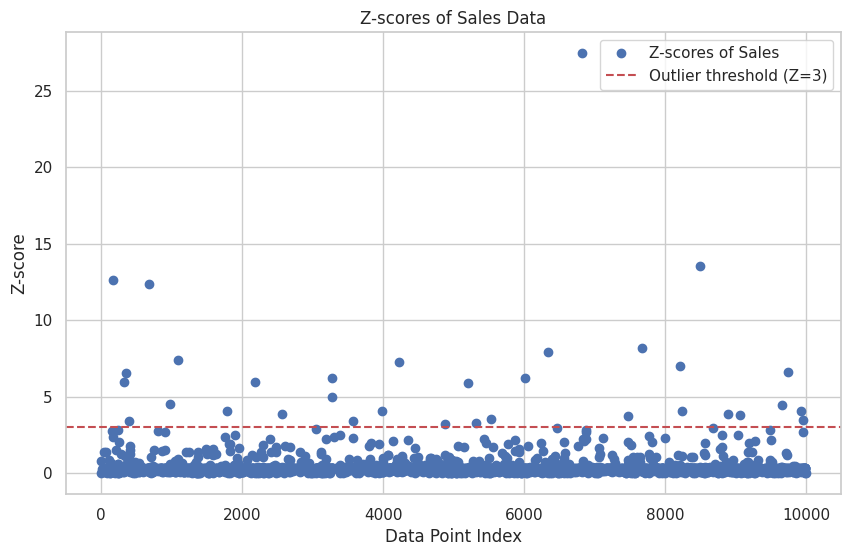

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(z_scores_df['Sales'], marker='o', linestyle='', label='Z-scores of Sales')
plt.axhline(y=3, color='r', linestyle='--', label='Outlier threshold (Z=3)')
plt.xlabel('Data Point Index')
plt.ylabel('Z-score')
plt.title('Z-scores of Sales Data')
plt.legend()
plt.show()

After entering the new attributes and cleaning the data, there are 9,667 rows and 26 columns because the new attributes related to the delivery date have been added. Anomalies could be detected by Delivery Time (Days), but the maximum delivery time did not exceed 7 days, so no anomalies were found

# Exploratory Data Analysis (EDA)



Conduct EDA to identify patterns, trends, and correlations between

by sales, regions and product categories Visualize trends using line graphs, bar charts and histograms (Matplotlib/Seabor) Analyze seasonal sales trends and identify the best regions/products.

In [ ]:
print(data_cleaned.head())
print(data_cleaned.info())
print(data_cleaned.describe())

    Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0        1  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
1        2  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
13      14  CA-2016-161389 2016-05-12 2016-10-12  Standard Class    IM-15070   
35      36  CA-2016-117590 2016-08-12 2016-10-12     First Class    GH-14485   
36      37  CA-2016-117590 2016-08-12 2016-10-12     First Class    GH-14485   

   Customer Name    Segment        Country        City  ... Quantity  \
0    Claire Gute   Consumer  United States   Henderson  ...        2   
1    Claire Gute   Consumer  United States   Henderson  ...        3   
13  Irene Maddox   Consumer  United States     Seattle  ...        3   
35     Gene Hale  Corporate  United States  Richardson  ...        7   
36     Gene Hale  Corporate  United States  Richardson  ...        5   

    Discount    Profit Delivery Time (Days) Order Day of Week Order Month  \
0        

In [ ]:
data_cleaned['Year-Month'] = data_cleaned['Order Date'].dt.to_period('M')

monthly_sales = data_cleaned.groupby('Year-Month')['Sales'].sum().reset_index()
print(monthly_sales.head())

  Year-Month      Sales
0    2014-01  16832.587
1    2014-02  11833.618
2    2014-03   7159.670
3    2014-04   8463.502
4    2014-05  11116.361


<ipython-input-18-93b8eb53d766>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Year-Month'] = data_cleaned['Order Date'].dt.to_period('M')


# Exploratory Data Analysis (EDA)



We will conduct EDA to identify patterns, trends and correlations between sales, regions and product categories. We will use the Matplotlib and Seaborn libraries to visualize trends using line graphs, bar charts, and histograms. We will also analyze seasonal sales trends and identify the best regions and products. Let's build a heat map for correlations and identify anomalies over time.

In [ ]:
data_cleaned['Order Date'] = pd.to_datetime(data_cleaned['Order Date'], format='%d/%m/%Y', errors='coerce')




# Let's add a 'Year-Month' column to aggregate sales by month

data_cleaned['Year-Month'] = data_cleaned['Order Date'].dt.to_period('M')




# Aggregation of sales for the month

monthly_sales = data_cleaned.groupby('Year-Month')['Sales'].sum().reset_index()

monthly_sales['Year-Month'] = monthly_sales['Year-Month'].dt.to_timestamp()



print(monthly_sales.head())

  Year-Month      Sales
0 2014-01-01  16832.587
1 2014-02-01  11833.618
2 2014-03-01   7159.670
3 2014-04-01   8463.502
4 2014-05-01  11116.361


<ipython-input-19-f71c8372c62d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Order Date'] = pd.to_datetime(data_cleaned['Order Date'], format='%d/%m/%Y', errors='coerce')
<ipython-input-19-f71c8372c62d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Year-Month'] = data_cleaned['Order Date'].dt.to_period('M')



# 1. Visualization of Sales Trends for the Month

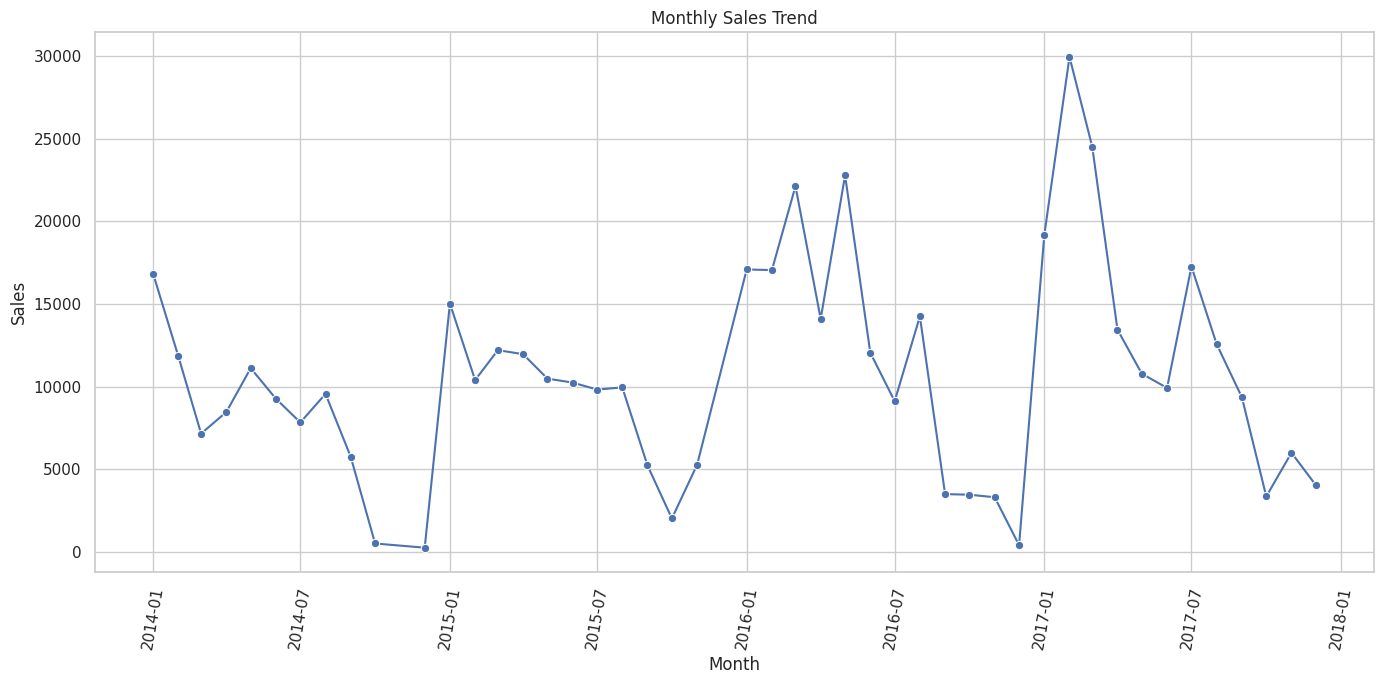

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(x='Year-Month', y='Sales', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()


# 2. Analysis of Sales by Regions

In [ ]:
data_cleaned['Country'].unique()

array(['United States'], dtype=object)

          City    Sales
0        Akron   49.704
1  Albuquerque  255.850
2   Alexandria  304.650
3        Allen  259.942
4     Amarillo  543.252


<ipython-input-22-ab3149860542>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='City', data=top_cities, palette='viridis')


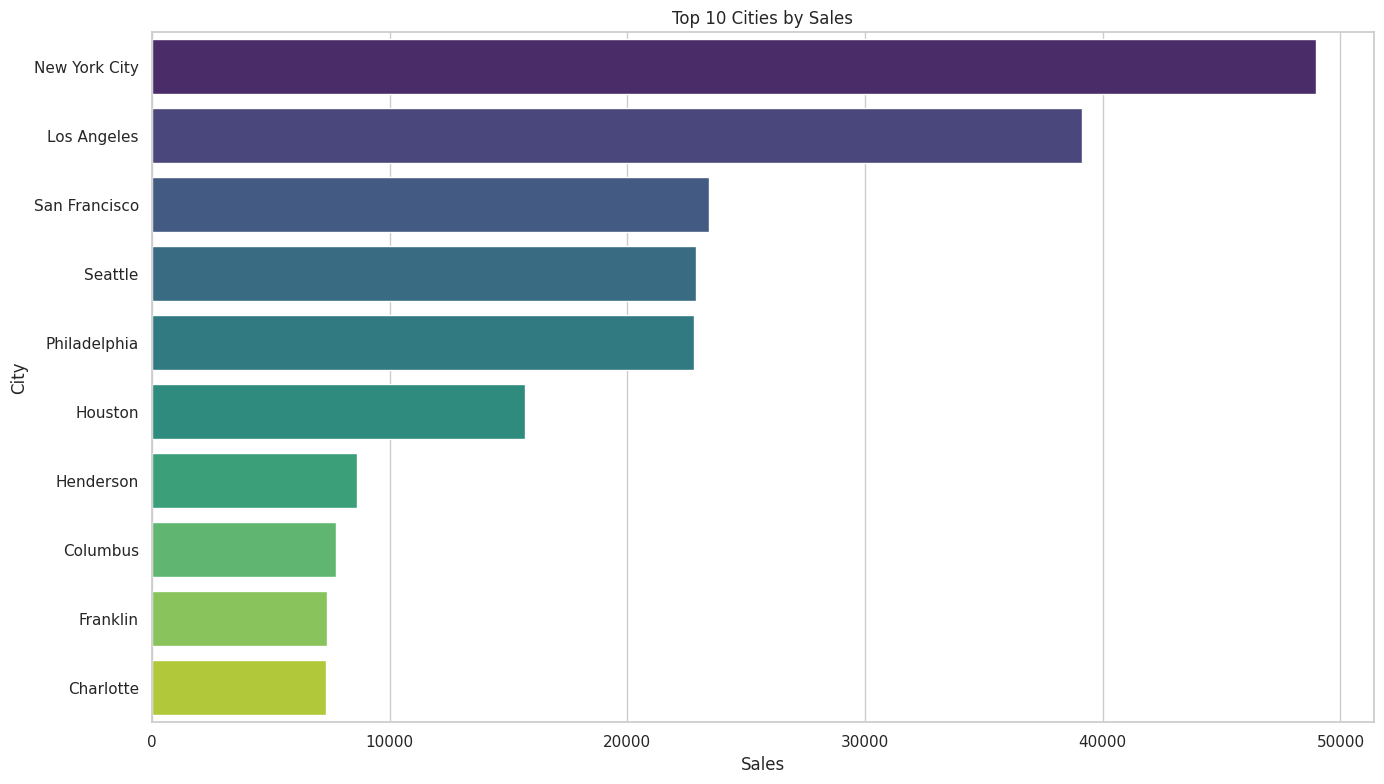

In [ ]:

# Aggregation of sales by country and city
region_sales = data_cleaned.groupby(['City'])['Sales'].sum().reset_index()
print(region_sales.head())


# Top 10 cities by sales
top_cities = region_sales.sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize=(14,8))
sns.barplot(x='Sales', y='City', data=top_cities, palette='viridis')
plt.title('Top 10 Cities by Sales')
plt.xlabel('Sales')
plt.ylabel('City')
plt.tight_layout()
plt.show()


# 3. Analysis of Sales by Goods

          Category        Sales
0        Furniture  175656.2293
1  Office Supplies  160465.3540
2       Technology  154717.0250


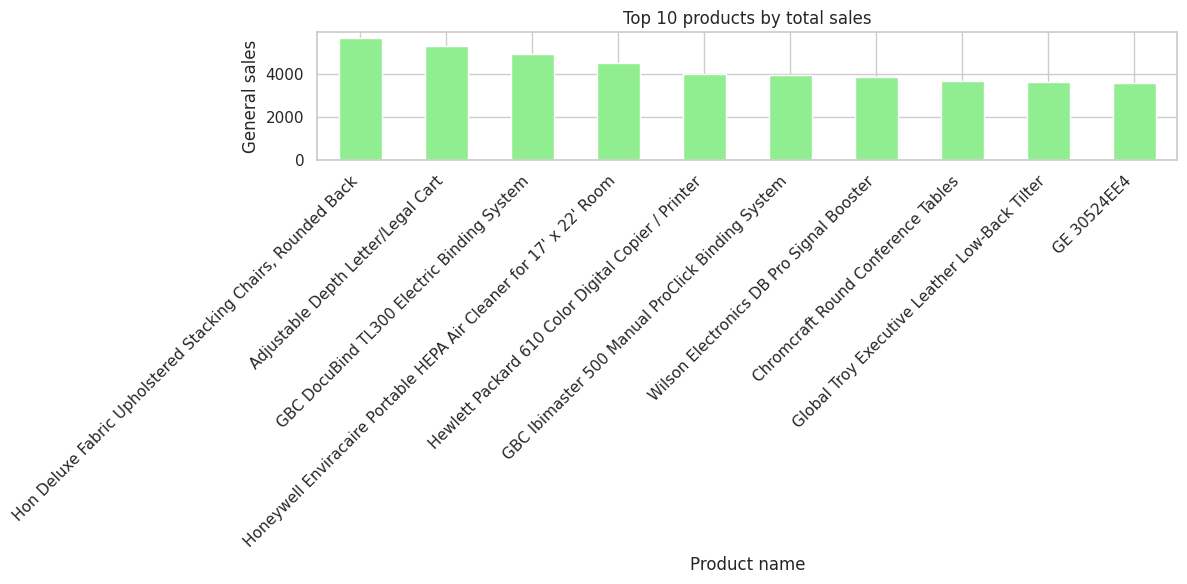

In [ ]:

# Aggregation of sales by category
category_sales = data_cleaned.groupby('Category')['Sales'].sum().reset_index()
print(category_sales)


# Grouping of goods by total sales
top_products = data_cleaned.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)


# Visualization of the top 10 products by total sales
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='lightGreen')
plt.title('Top 10 products by total sales')
plt.xlabel('Product name')
plt.ylabel('General sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Analysis of Correlations between Numerical Variables

                         Sales  Delivery Time (Days)  Order Day of Week  \
Sales                 1.000000             -0.004219          -0.014867   
Delivery Time (Days) -0.004219              1.000000           0.022709   
Order Day of Week    -0.014867              0.022709           1.000000   
Order Month           0.010773             -0.325896          -0.038365   
Order Week of Year    0.012978             -0.312244          -0.022210   
Order Day of Year     0.012214             -0.328544          -0.035398   
Order Year           -0.007546             -0.080533           0.043089   
Order Quarter         0.008845             -0.337329          -0.035627   

                      Order Month  Order Week of Year  Order Day of Year  \
Sales                    0.010773            0.012978           0.012214   
Delivery Time (Days)    -0.325896           -0.312244          -0.328544   
Order Day of Week       -0.038365           -0.022210          -0.035398   
Order Month         

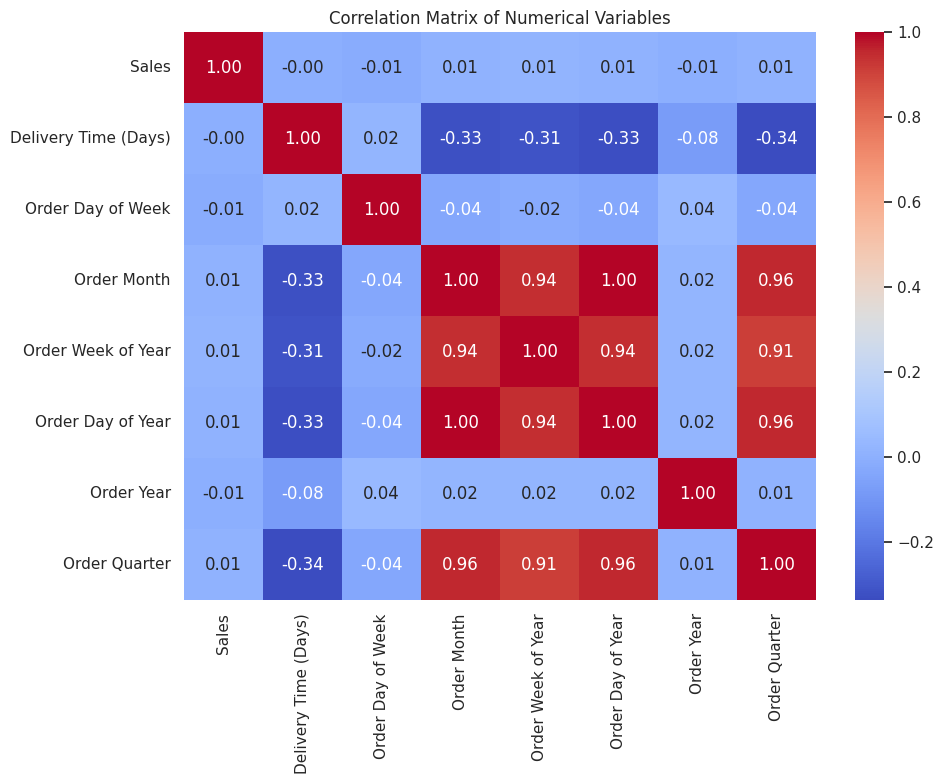

In [ ]:
# Selection of numeric columns for correlation
numeric_cols = ['Sales', 'Delivery Time (Days)',
               'Order Day of Week', 'Order Month', 'Order Week of Year',
               'Order Day of Year', 'Order Year', 'Order Quarter']

# Calculation of the correlation matrix
corr_matrix = data_cleaned[numeric_cols].corr()

print(corr_matrix)


# Visualization of the correlation matrix using Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()


# 5. Histograms and Boxplots for Sales

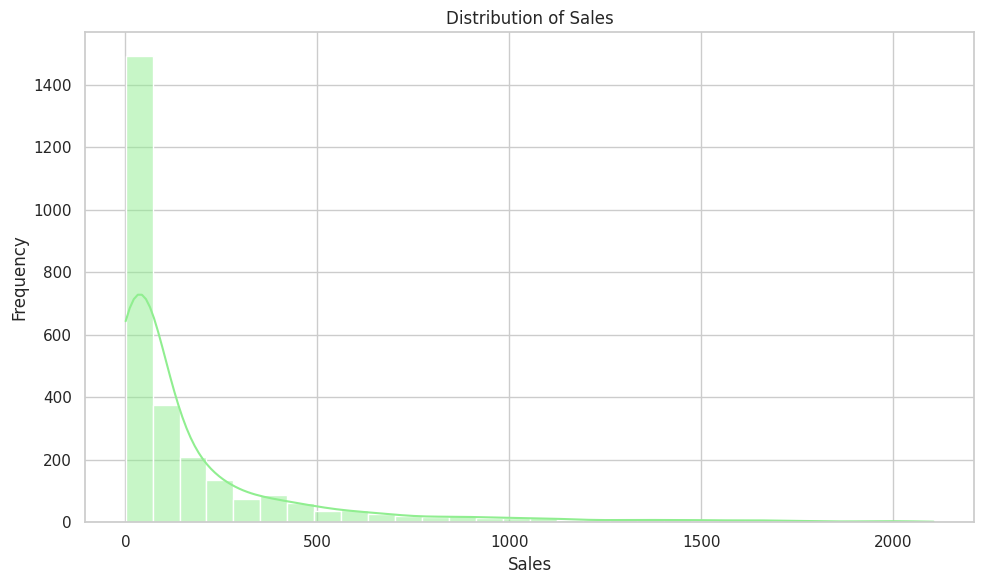

<ipython-input-33-563ec49bb0b3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data_cleaned, palette='Set3')


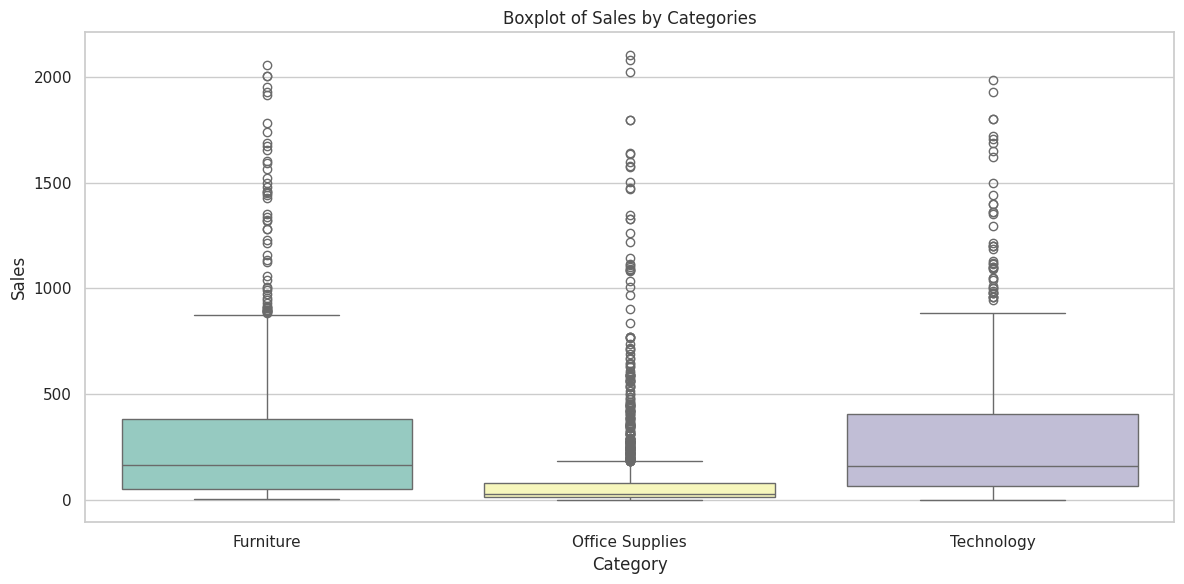

In [ ]:

# Histogram of sales distribution
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['Sales'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Boxplot of sales by category
plt.figure(figsize=(12,6))
sns.boxplot(x='Category', y='Sales', data=data_cleaned, palette='Set3')
plt.title('Boxplot of Sales by Categories')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# 6. Pair Graphs for Detecting Relationships

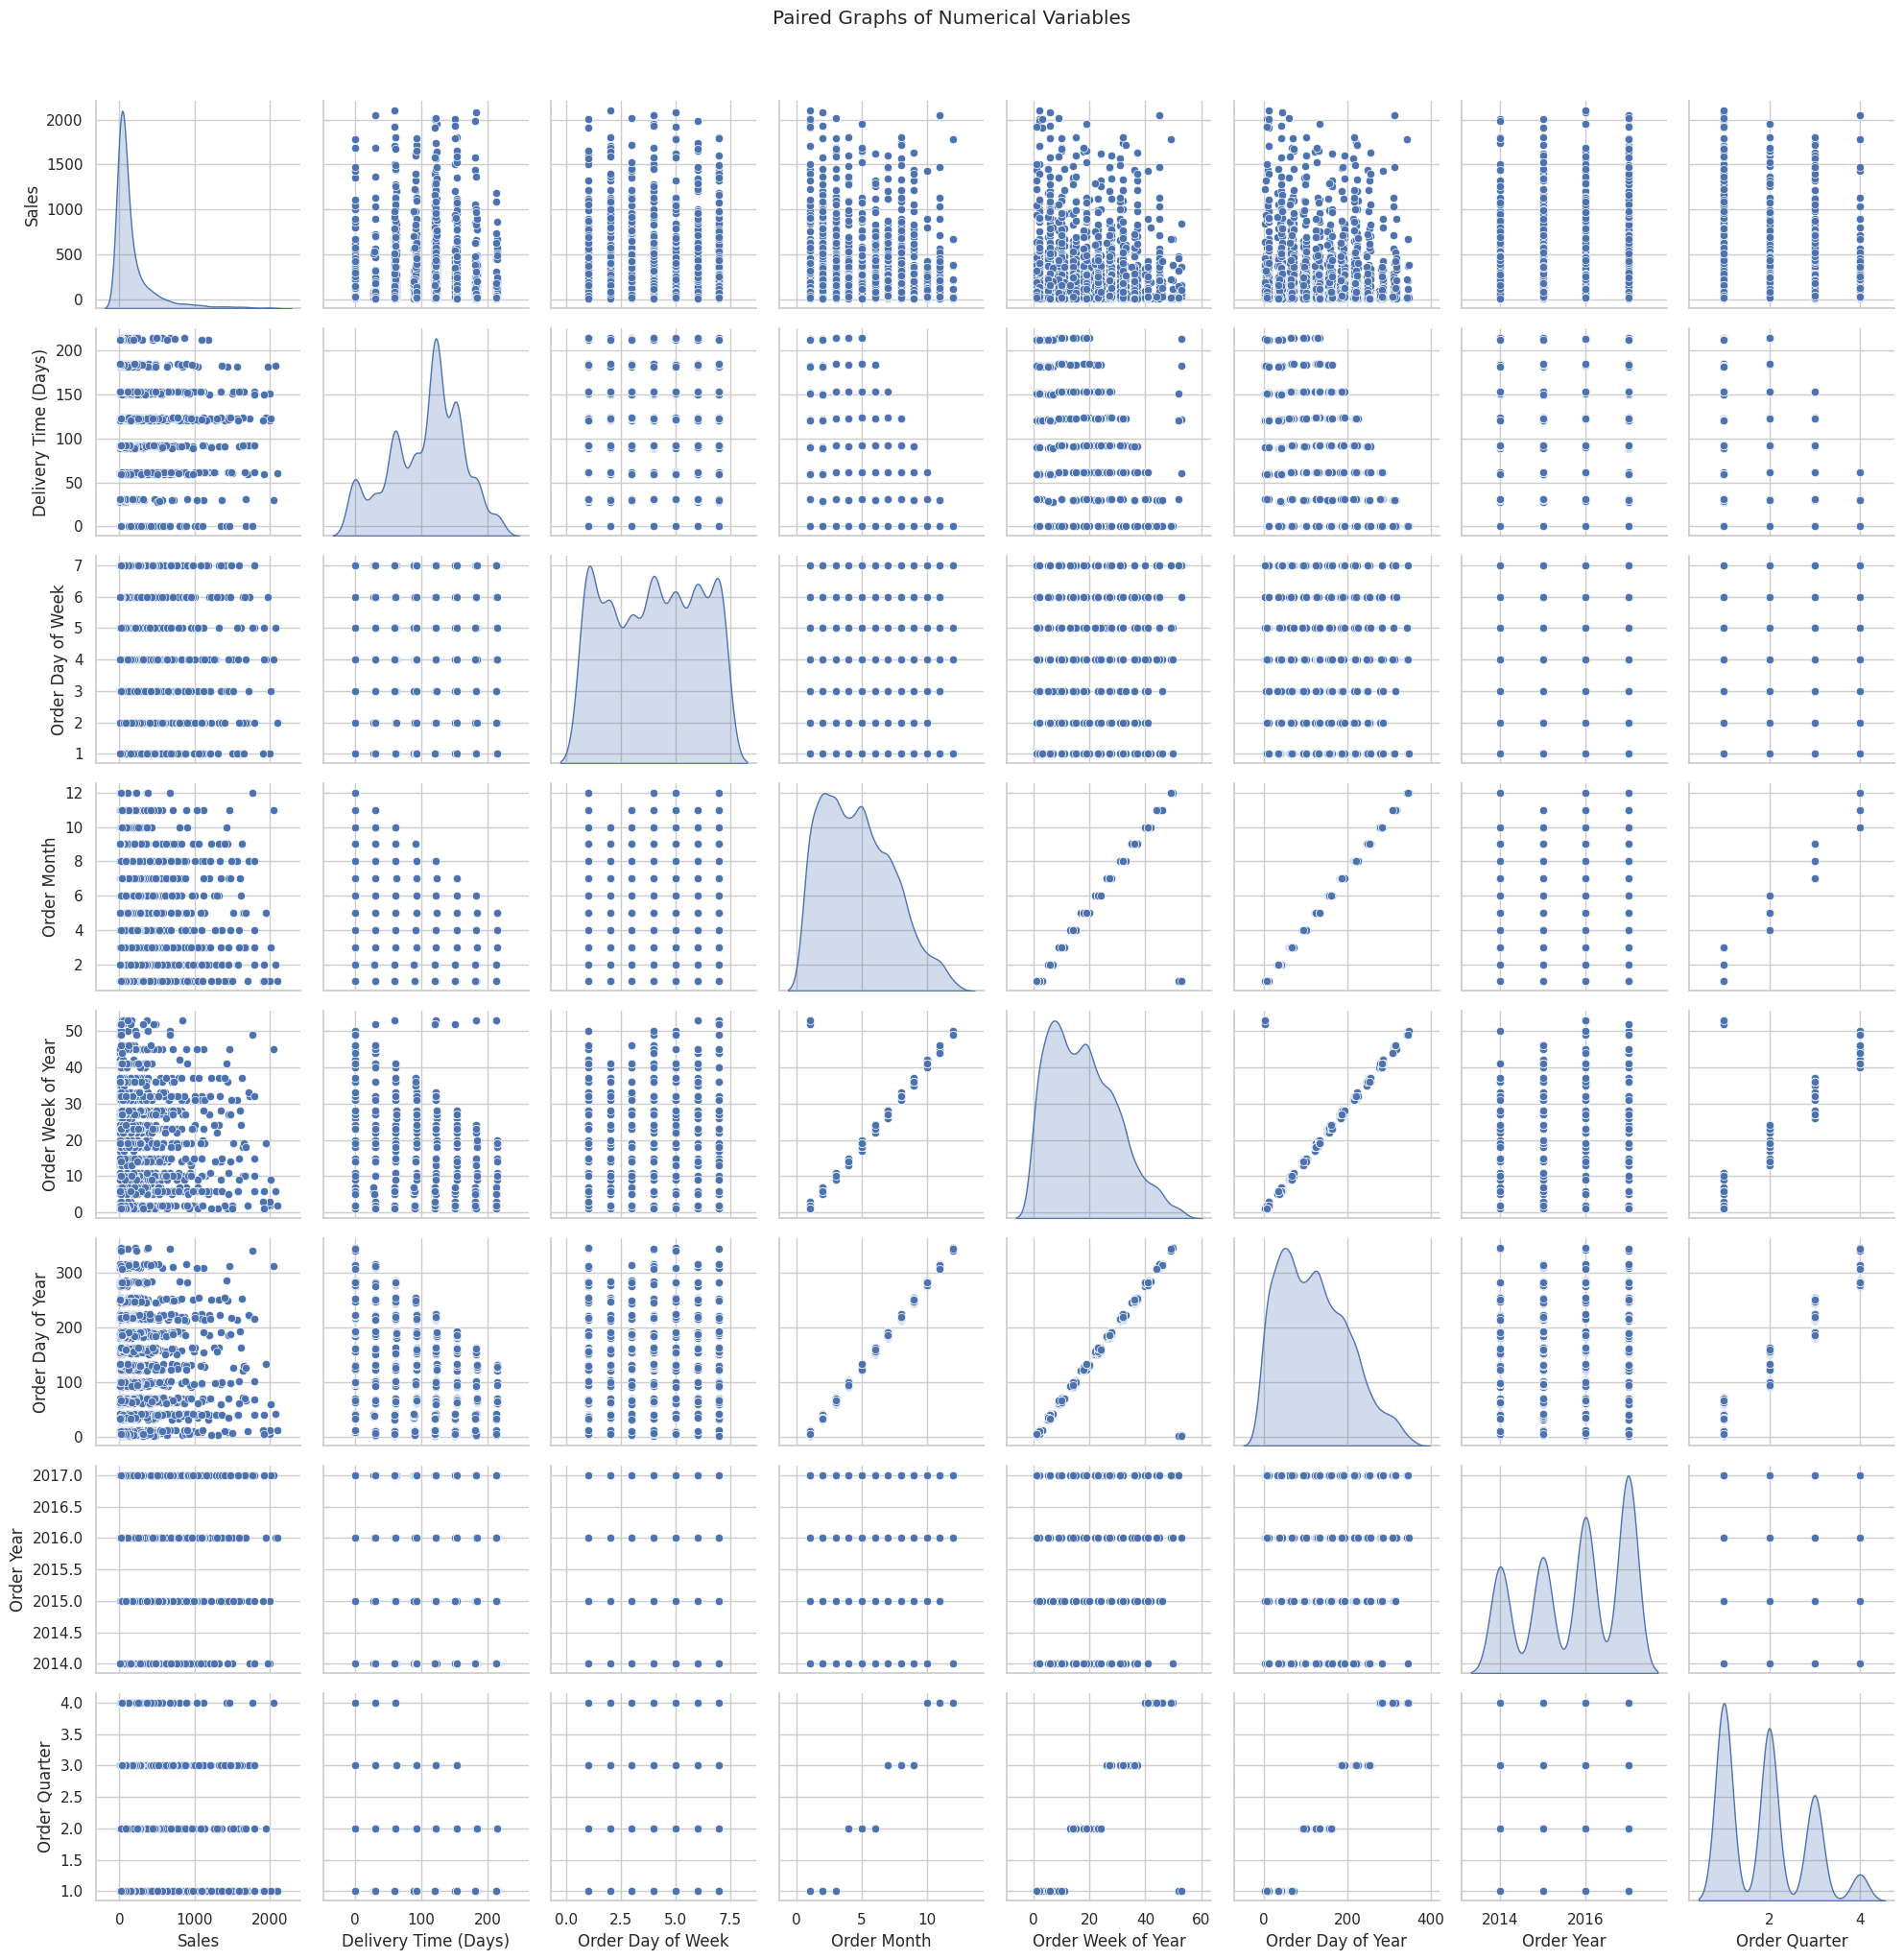

In [ ]:
sns.pairplot(data_cleaned[numeric_cols], diag_kind='kde')
plt.suptitle('Paired Graphs of Numerical Variables', y=1.02)
plt.tight_layout()
plt.show()


7. Evaluation of the influence of signs on sales forecasting using sklearn

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Selection of target variable and features
data = data_cleaned.copy()
target = 'Sales'
features = data.drop(columns=[target]).select_dtypes(include=['number']).columns.tolist()

# Separation of data into training and test samples
X = data[features].values
y = data[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an SVM model with a linear kernel and training
model = make_pipeline(StandardScaler(), SVR(kernel='linear'))
model.fit(X_train, y_train)


# Evaluation of the influence of signs
feature_importance = model.named_steps['svr'].coef_.flatten()  # access coefficients in SVR


# Table of influence of incoming signs on forecasting 'Sales'
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\n Table of influence of incoming signs on forecasting 'Sales':")
print(importance_df)



 Table of influence of incoming signs on forecasting 'Sales':
                 Feature  Importance
4                 Profit  204.592957
3               Discount   11.283313
2               Quantity   10.685839
8     Order Week of Year    2.432212
9      Order Day of Year    1.153673
0                 Row ID    0.604965
7            Order Month    0.306417
5   Delivery Time (Days)   -0.045307
1            Postal Code   -0.298983
6      Order Day of Week   -0.300749
11         Order Quarter   -1.301036
10            Order Year   -1.301926




# Conclusions from EDA

After running EDA, we can draw the following conclusions:

1. **Sales Trends:** There is a general increasing trend in sales with pronounced seasonal fluctuations.

2. **Top Regions:** The highest sales are observed in New York, Los Angeles, and San Francisco

3. **Product Categories:** The highest demand is in the Furniture category, lower demand in Office Supplies, and the lowest in Technology, but the differences are insignificant

4. **Correlations:** There is no or insignificant correlation between Sales and the numeric variables. Delivery time is also independent of other numeric data.

5. **Feature Input Analysis:** The Country, Order Quarter, and Order Month stop values ​​can be removed. Row ID is not informative for test data - it cannot be **used**